In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np


In [3]:
#first read the csv:
Nrbdata=pd.read_csv("../Resources/Nairobi/nairobi_clean.csv")
Nrbdata.head()

,Unnamed: 0,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,location
0,0,Shared room,Nairobi,Nairobi,0,0.0,3,1.0,45.0,-1.267705,36.765277,0101000020E6100000C4B0C398F4614240639CBF098548...
1,1,Shared room,Nairobi,Nairobi,0,0.0,3,1.0,45.0,-1.267733,36.766698,0101000020E61000004DF4F92823624240A1F5F065A248...
2,2,Shared room,Nairobi,Nairobi,0,0.0,3,1.0,60.0,-1.263079,36.795796,0101000020E6100000D124B1A4DC654240EB3A54539235...
3,3,Shared room,Nairobi,Nairobi,1,0.0,3,1.0,60.0,-1.296785,36.778004,0101000020E61000001F1494A2956342400118CFA0A1BF...
4,4,Shared room,Nairobi,Nairobi,0,0.0,2,1.0,60.0,-1.255794,36.752600,0101000020E61000001C7C61325560424059350873BB17...


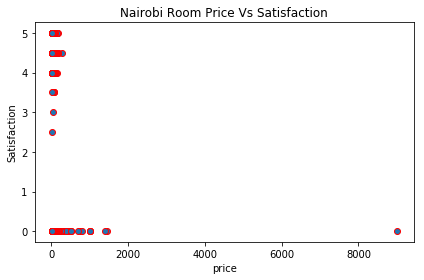

In [6]:
#compare price Vs overall satisfaction
NrbPrice=Nrbdata["price"]
NrbSatisfaction=Nrbdata["overall_satisfaction"]

#scatter plot to show relation of the two
plt.scatter(NrbPrice,NrbSatisfaction,marker="o",edgecolor="red")

plt.title("Nairobi Room Price Vs Satisfaction")
plt.xlabel('price')
plt.ylabel('Satisfaction')
plt.tight_layout()

plt.savefig('Nairobi_figures/NrbPriceVsSatisfaction.png')



In [7]:
#Roomtypes Vs Overall satisfaction
Nrb_rooms=Nrbdata["room_type"].unique()

NrbRoomList=[]
NrbRoomMean=[]

#list of unique room types
for x in Nrb_rooms:
    NrbRoomList.append(x)
    #mean of room type
    NrbRoomMean.append(Nrbdata.loc[Nrbdata["room_type"]==x]["price"].mean())
    print(NrbRoomList)
    print(NrbRoomMean)

['Shared room']
[37.43478260869565]
['Shared room', 'Entire home/apt']
[37.43478260869565, 85.0176322418136]
['Shared room', 'Entire home/apt', 'Private room']
[37.43478260869565, 85.0176322418136, 38.286087524493794]


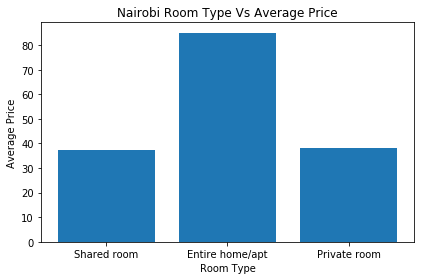

In [8]:
#plt barchat that reflects the data
plt.bar(NrbRoomList,NrbRoomMean,align="center")
plt.title("Nairobi Room Type Vs Average Price")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.grid
plt.tight_layout()
plt.savefig("Nairobi_figures/NairobiRoomsVsMeanPrice.png")

In [12]:
#Room satisfaction
Nrb_Satisfaction=[]
for x in Nrb_rooms:
    Nrb_Satisfaction.append(Nrbdata.loc[Nrbdata["room_type"]==x]["overall_satisfaction"].mean())
    print(Nrb_Satisfaction)

[0.3782608695652174]
[0.3782608695652174, 1.163727959697733]
[0.3782608695652174, 1.163727959697733, 0.8478118876551274]


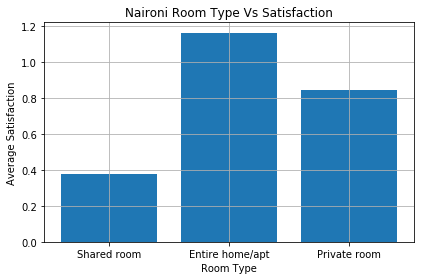

In [15]:
#Plt Barchart to represent the same
plt.bar(NrbRoomList,Nrb_Satisfaction,align="center")
plt.title("Naironi Room Type Vs Satisfaction")
plt.xlabel("Room Type")
plt.ylabel("Average Satisfaction")
plt.grid()
plt.tight_layout()

plt.savefig("Nairobi_figures/NrbRoomsVsAvgSatisfaction")


In [25]:
#Overall price average for rooms
NrbPrice=Nrbdata["price"].mean()
#print(f "Nairobi mean price per room is:{NrbPrice}")
#NrbPrice
print(f"Nairobi total average price is : {NrbPrice}")

Nairobi total average price is : 57.869933027846315


Number of rooms in Nairobi
Shared rooms: 115
Entire home/spt rooms: 1191
Private rooms: 1531


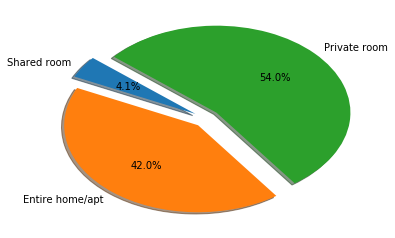

In [23]:
#count total number of rooms per type
Nrb_shared=Nrbdata.loc[Nrbdata["room_type"]=="Shared room"]["room_type"].count()
Nrb_entire=Nrbdata.loc[Nrbdata["room_type"]=="Entire home/apt"]["room_type"].count()
Nrb_private=Nrbdata.loc[Nrbdata["room_type"]=="Private room"]["room_type"].count()
#nairobi_clean["room_type"].unique()
Nrb_pie_rooms=[Nrb_shared,Nrb_entire,Nrb_private]
Nrb_pie_label=["Shared room","Entire home/apt","Private room"]
print("Number of rooms in Nairobi")
print(f"Shared rooms: {Nrb_shared}")
print(f"Entire home/spt rooms: {Nrb_entire}")
print(f"Private rooms: {Nrb_private}")
explode=(0.1,0.1,0.1)
plt.pie(Nrb_pie_rooms,explode=explode,labels=Nrb_pie_label,shadow=True,
       autopct="%1.1F%%",startangle=140)
plt.savefig("Nairobi_figures/Nrb_rooms.png")

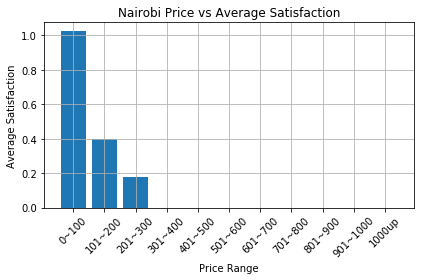

In [24]:
#set the x axis
Nrbpricelist=["0~100","101~200","201~300","301~400","401~500","501~600","601~700"
           ,"701~800","801~900","901~1000","1000up"]
#Room satisfaction by range
sat0=Nrbdata.loc[(Nrbdata["price"]<101)&(Nrbdata["price"]>0)]["overall_satisfaction"].mean()
sat100=Nrbdata.loc[(Nrbdata["price"]>100)&(Nrbdata["price"]<201)]["overall_satisfaction"].mean()
sat200=Nrbdata.loc[(Nrbdata["price"]>200)&(Nrbdata["price"]<301)]["overall_satisfaction"].mean()
sat300=Nrbdata.loc[(Nrbdata["price"]>300)&(Nrbdata["price"]<401)]["overall_satisfaction"].mean()
sat400=Nrbdata[(Nrbdata["price"]>400)&(Nrbdata["price"]<501)]["overall_satisfaction"].mean()
sat500=Nrbdata.loc[(Nrbdata["price"]>500)&(Nrbdata["price"]<601)]["overall_satisfaction"].mean()
sat600=Nrbdata.loc[(Nrbdata["price"]>600)&(Nrbdata["price"]<701)]["overall_satisfaction"].mean()
sat700=Nrbdata.loc[(Nrbdata["price"]>700)&(Nrbdata["price"]<801)]["overall_satisfaction"].mean()
sat800=Nrbdata.loc[(Nrbdata["price"]>800)&(Nrbdata["price"]<901)]["overall_satisfaction"].mean()
sat900=Nrbdata.loc[(Nrbdata["price"]>900)&(Nrbdata["price"]<1001)]["overall_satisfaction"].mean()
sat1000up=Nrbdata.loc[(Nrbdata["price"]>1000)]["overall_satisfaction"].mean()
satlist=[sat0,sat100,sat200,sat300,sat400,sat500,sat600,sat700
            ,sat800,sat900,sat1000up]
plt.bar(Nrbpricelist,satlist,align="center")
plt.xticks(rotation=45)
plt.title("Nairobi Price vs Average Satisfaction")
plt.xlabel("Price Range")
plt.ylabel("Average Satisfaction")
plt.grid()
plt.tight_layout()
plt.savefig("Nairobi_figures/NairobiRmPriceVsMeanSatisfaction.png")
